In [1]:
import pandas as pd
import numpy as np
import requests
import io
import csv
import codecs
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score

csv.field_size_limit(1000000)

131072

In [2]:
pd.set_option("display.min_rows", 200)

In [3]:
df = pd.read_csv('rates.csv', encoding='cp1251', sep=';', header=0)

In [4]:
#for i in df.columns:
#    print(i, len(set(df[~df[i].isna()][i])))
df.dtypesTYPENAME

SECID                      object
SHORTNAME                  object
NAME                       object
TYPENAME                   object
ISIN                       object
REGNUMBER                  object
LISTLEVEL                 float64
FACEVALUE                  object
FACEUNIT                   object
ISSUESIZE                 float64
IS_COLLATERAL               int64
IS_EXTERNAL                 int64
PRIMARY_BOARDID            object
PRIMARY_BOARD_TITLE        object
MATDATE                    object
IS_RII                     object
DURATION                  float64
EVENINGSESSION              int64
MORNINGSESSION              int64
IS_QUALIFIED_INVESTORS      int64
HIGH_RISK                   int64
COUPONFREQUENCY           float64
YIELDATWAP                 object
COUPONDATE                 object
COUPONPERCENT              object
COUPONVALUE                object
COUPONDAYSPASSED          float64
COUPONDAYSREMAIN          float64
COUPONLENGTH              float64
ISSUEDATE     

In [5]:
df.TYPENAME.value_counts()
df = pd.concat([df, pd.get_dummies(data=df.TYPENAME)], axis=1)
df = df.drop('Биржевые облигации', axis=1)

In [6]:
df.PRICE = df.PRICE.str.replace(',', '.').astype(float)/100-1
df.FACEVALUE = df.FACEVALUE.str.replace(',', '.').astype(float)
df['foreign'] = np.where(df.FACEUNIT=='RUB', 1, 0)
df = pd.concat([df, pd.get_dummies(data=pd.cut(df.DURATION, [0, 365, 365*5, 365*100], labels=['SHORT', 'MEDIUM', 'LONG']))], axis=1)
df = df.drop('MEDIUM', axis=1)
df

,SECID,SHORTNAME,NAME,TYPENAME,ISIN,REGNUMBER,LISTLEVEL,FACEVALUE,FACEUNIT,ISSUESIZE,...,Коммерческая облигация,Корпоративные еврооблигации,Корпоративные облигации,Муниципальные облигации,ОФЗ,Облигации государств,Региональные облигации,foreign,SHORT,LONG
0,AMUNIBB2AER2,UBANK11/22,UNIBANK OJSC Series 1,Корпоративные еврооблигации,AMUNIBB2AER2,NaN,3.0,100.0,USD,10000.0,...,0,1,0,0,0,0,0,0,1,0
1,AMUNIBB2DER6,UBANK02/24,UNIBANK OJSC Series 1 21,Корпоративные еврооблигации,AMUNIBB2DER6,NaN,3.0,100.0,USD,33478.0,...,0,1,0,0,0,0,0,0,0,0
2,AT0000A2UF10,Raiff CAG,Raiffeisen Centrobank AG,Корпоративные еврооблигации,AT0000A2UF10,NaN,3.0,1000.0,USD,50000.0,...,0,1,0,0,0,0,0,0,0,0
3,CH0248531110,VTB-24 CHF,VTB CAPITAL S.A. 24 CHF,Корпоративные еврооблигации,CH0248531110,NaN,NaN,5000.0,CHF,70000.0,...,0,1,0,0,0,0,0,0,0,0
4,CH0374882816,GAZ-22 CHF,GAZ CAPITAL SA 2.25 19/07/22,Корпоративные еврооблигации,CH0374882816,NaN,NaN,5000.0,CHF,100000.0,...,0,1,0,0,0,0,0,0,0,0
5,CH0379268748,RZD-23 CHF,RZD Capital PLC 23 CHF,Корпоративные еврооблигации,CH0379268748,NaN,NaN,5000.0,CHF,90000.0,...,0,1,0,0,0,0,0,0,0,0
6,CH0385518086,ALFA-22 CH,Alfa Holding Issuance 09/11/22,Корпоративные еврооблигации,CH0385518086,NaN,NaN,5000.0,CHF,33000.0,...,0,1,0,0,0,0,0,0,0,0
7,CH0404311711,GAZ-23 CHF,GAZ CAPITAL SA 1.45 6/3/23 CHF,Корпоративные еврооблигации,CH0404311711,NaN,NaN,5000.0,CHF,150000.0,...,0,1,0,0,0,0,0,0,0,0
8,CH0419041618,RZD-25 CHF,RZD CAPITAL PLC 0.898 03/10/25,Корпоративные еврооблигации,CH0419041618,NaN,NaN,5000.0,CHF,70000.0,...,0,1,0,0,0,0,0,0,0,0
9,CH0419041634,RZD-28 CHF,RZD CAPITAL PLC 03/04/28,Корпоративные еврооблигации,CH0419041634,NaN,NaN,5000.0,CHF,30000.0,...,0,1,0,0,0,0,0,0,0,0


In [7]:
df.COUPONFREQUENCY = pd.cut(df.COUPONFREQUENCY, [0, 2, 4, 12], labels=['each half', 'each quartle', 'each month'])
df = pd.concat([df, pd.get_dummies(data=df.COUPONFREQUENCY)], axis=1)
df = df.drop('each half', axis=1)

In [8]:
df.COUPONPERCENT = df.COUPONPERCENT.str.replace(',', '.').astype(float)
df.COUPONPERCENT = np.where(df.COUPONPERCENT.isna(),0,df.COUPONPERCENT)

In [9]:
df[['IS_QUALIFIED_INVESTORS', 'FACEVALUE', 'HIGH_RISK', 'Еврооблигации МинФина', 'Коммерческая облигация',
   'Корпоративные еврооблигации', 'Корпоративные облигации',
   'Муниципальные облигации', 'ОФЗ', 'Облигации государств',
   'Региональные облигации', 'foreign', 'SHORT', 'LONG', 'each quartle', 'each month']].dtypes

IS_QUALIFIED_INVESTORS           int64
FACEVALUE                      float64
HIGH_RISK                        int64
Еврооблигации МинФина            uint8
Коммерческая облигация           uint8
Корпоративные еврооблигации      uint8
Корпоративные облигации          uint8
Муниципальные облигации          uint8
ОФЗ                              uint8
Облигации государств             uint8
Региональные облигации           uint8
foreign                          int32
SHORT                            uint8
LONG                             uint8
each quartle                     uint8
each month                       uint8
dtype: object

<AxesSubplot:xlabel='PRICE', ylabel='Count'>

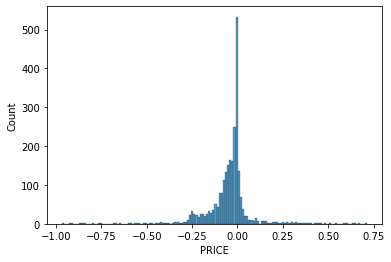

In [10]:
sns.histplot(data = df['PRICE'])

In [11]:
df=df[~df.PRICE.isna()]
df=df[~df.COUPONDAYSREMAIN.isna()]
df=df[~df.DURATION.isna()]
df.DURATION

0        287.0
2       1012.0
13       138.0
15       828.0
17      1847.0
18       988.0
19      1142.0
20        80.0
22      2393.0
24      1520.0
26        70.0
27      1268.0
28         7.0
29         6.0
30        10.0
35        37.0
36        42.0
38        42.0
39        43.0
43       193.0
44       600.0
45        69.0
49       966.0
51       169.0
52       182.0
53       883.0
55       739.0
56       248.0
57       255.0
58       749.0
         ...  
2706     781.0
2709     981.0
2711    1807.0
2712     850.0
2713     797.0
2714    1104.0
2715     659.0
2716     819.0
2719    1024.0
2721    2938.0
2723    1287.0
2724    1784.0
2725    1163.0
2727     988.0
2729    1564.0
2730    1538.0
2732     981.0
2733    1845.0
2735    1801.0
2736    1914.0
2740    1844.0
2742    2204.0
2743    1857.0
2747    1959.0
2748    1145.0
2749    1801.0
2752     655.0
2753    1163.0
2754    1039.0
2762    1207.0
Name: DURATION, Length: 1830, dtype: float64

In [34]:
import itertools
df1 = df.sample(1200)
Y = df1['PRICE']
X_all = [['COUPONPERCENT'], ['COUPONDAYSREMAIN'], ['IS_QUALIFIED_INVESTORS'], ['FACEVALUE'], ['HIGH_RISK'], 
         ['Еврооблигации МинФина', 'Коммерческая облигация',
         'Корпоративные еврооблигации', 'Корпоративные облигации',
         'Муниципальные облигации', 'ОФЗ', 'Облигации государств',
         'Региональные облигации'], ['foreign'], ['SHORT', 'LONG'],
         ['each quartle', 'each month']]
i=0
d=dict()
for L in range(1, len(X_all)+1):
    for subset in itertools.combinations(X_all, L):
        Xlist = [j for element in subset for j in element]
        X = df1[Xlist]
        model = sm.OLS(Y, X)
        results = model.fit()
        d[i] = (list(X.columns), results.rsquared, r2_score(df[['PRICE'] + Xlist].dropna()['PRICE'], results.predict(df[['PRICE'] + Xlist].dropna()[Xlist])))
        i += 1

In [35]:
v=[i[2] for i in list(d.values())]
k=list(d.keys())
#[d[i][1] for i in d]
k[v.index(max(v))], d[k[v.index(max(v))]]

(510,
 (['COUPONPERCENT',
   'COUPONDAYSREMAIN',
   'IS_QUALIFIED_INVESTORS',
   'FACEVALUE',
   'HIGH_RISK',
   'Еврооблигации МинФина',
   'Коммерческая облигация',
   'Корпоративные еврооблигации',
   'Корпоративные облигации',
   'Муниципальные облигации',
   'ОФЗ',
   'Облигации государств',
   'Региональные облигации',
   'foreign',
   'SHORT',
   'LONG',
   'each quartle',
   'each month'],
  0.42056945831962167,
  0.27023181044113986))

In [14]:
[d[i][2] for i in d]

[-0.15960024994270317,
 0.10906377923925747,
 0.0990317981914185,
 -0.10442973096849295,
 -0.22360872363031414,
 -0.1844955258378551,
 -0.14020157697168645,
 -0.029545615919113644,
 -0.18354677813041476,
 -0.1636849470038204,
 0.11487656418757697,
 0.1370416113512215,
 -0.06651019089990151,
 -0.15850495050506197,
 -0.14966097981395943,
 -0.11437578331761533,
 -0.0029490974839527784,
 -0.11520124525762632,
 -0.15165409451440226,
 0.19417524606092806,
 0.1294221508872201,
 0.10928944964845178,
 0.12528750188863358,
 0.13340125915448198,
 0.1107750051327907,
 0.14886638319503576,
 0.11073332070225583,
 0.14916316715243794,
 0.1007582597072838,
 0.13679986097978902,
 0.1602667469615512,
 0.1459042834591875,
 0.10537491375062524,
 0.14932371266210542,
 -0.1044329010918541,
 -0.07447785820222785,
 -0.0832798372197876,
 0.0375304223724805,
 -0.08110985328593245,
 -0.06779113604042353,
 -0.1822901343028971,
 -0.13945641317367152,
 -0.029015298573652926,
 -0.1835415363838011,
 -0.16151487789096

In [43]:
Y = df[~df['PRICE'].isna()]['PRICE']
X = df[~df['PRICE'].isna()][['COUPONPERCENT',
   'DURATION',
   'COUPONDAYSREMAIN',
   'IS_QUALIFIED_INVESTORS',
   'FACEVALUE',
   'HIGH_RISK',
   'Еврооблигации МинФина',
   'Коммерческая облигация',
   'Корпоративные еврооблигации',
   'Корпоративные облигации',
   'Муниципальные облигации',
   'ОФЗ',
   'Облигации государств',
   'Региональные облигации',
   'foreign',
   'SHORT',
   'LONG',
   'each quartle',
   'each month']]
model = sm.OLS(Y, X)
results = model.fit()
results.summary()
accuracy = sum([i*j>0 for i,j in zip(results.predict(X), Y)])/len(Y)
recall = sum([(i>0) and (i*j>0) for i,j in zip(results.predict(X), Y)])/sum([i>0 for i in Y])
precision = sum([(i>0) and (i*j>0) for i,j in zip(results.predict(X), Y)])/sum([i>0 for i in results.predict(X)])
print(accuracy, precision, recall)

0.7469945355191256 0.13898305084745763 0.1646586345381526


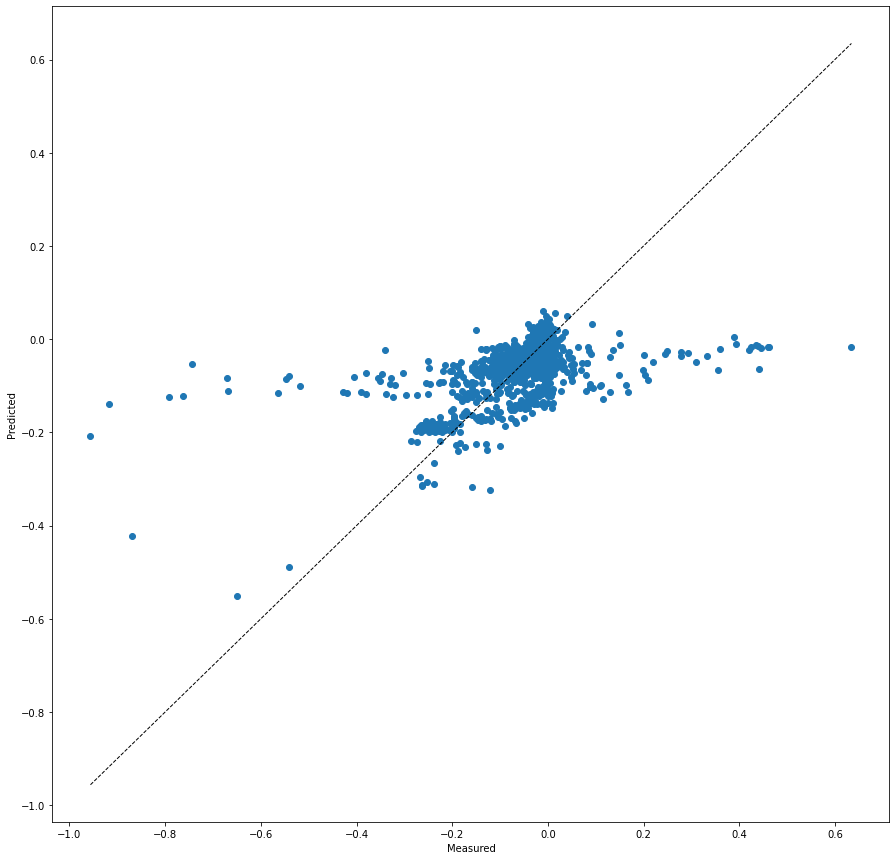

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
ax.scatter(Y, results.predict(X))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()